### 필요한 라이브러리 import


In [ ]:
#행렬패키지
import numpy as np

#데이터프레임 패키지
import pandas as pd

#시각화패키지
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

---

### Movie_lens data의 csv파일 호출 및 확인

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')
movies = pd.read_csv('/content/movies.csv')

In [ ]:
print('ratings의 shape와 데이터 구성')
print(ratings.shape) #dimension
print(ratings.head()) #데이터 구성


"""ratings는 총 4개의 컬럼이있고 각 컬럼당 100836의 행 데이터가 있다. ratings 속 컬럼은 유저정보, 영화정보, 유저가 준 영화 평점, 시간등이 있다.
"""

ratings의 shape와 데이터 구성
(100836, 4)
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


'ratings는 총 4개의 컬럼이있고 각 컬럼당 100836의 행 데이터가 있다. ratings 속 컬럼은 유저정보, 영화정보, 유저가 준 영화 평점, 시간등이 있다.\n'

In [ ]:
print('tags의 shape와 데이터 구성')
print(tags.shape) #dimension
print(tags.head()) #데이터 구성

"""tags는 총 4개의 컬럼이있고 각 컬럼당 3683의 행 데이터가 있다. tags 속 컬럼은 유저정보, 영화정보, 영화의 해쉬태그, 시간등이 있다.
"""

tags의 shape와 데이터 구성
(3683, 4)
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200


'tags는 총 4개의 컬럼이있고 각 컬럼당 3683의 행 데이터가 있다. tags 속 컬럼은 유저정보, 영화정보, 영화의 해쉬태그, 시간등이 있다.\n'

In [ ]:
print('movies의 shape와 데이터 구성')
print(movies.shape) #dimension
print(movies.head()) #데이터 구성

"""movies는 총 3개의 컬럼이있고 각 컬럼당 9742의 행 데이터가 있다. movies 속 컬럼은  영화정보, 영화의 장르, 영화 제목등이 있다.
"""

movies의 shape와 데이터 구성
(9742, 3)
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


'movies는 총 3개의 컬럼이있고 각 컬럼당 9742의 행 데이터가 있다. movies 속 컬럼은  영화정보, 영화의 장르, 영화 제목등이 있다.\n'

---


# 유저,영화 , 평점 데이터 분석

MovieLens 데이터를 간략하게 살펴보았습니다.

이제는 각 데이터별로 조금 deep하게 들어갑니다.



### ratings 데이터의 기초 통계량

#### ratings 데이터를 전체적으로 check

결측치를 확인하는 이유?

결측치의 여부를 파악하지않고 데이터를 처리 시 나오는 결과물의 영향을 줄 수 있습니다.

실제로, 관측된 결과와는 다른 결과를 만들 수 있기에 이러한 불상사를 예방하기 위해서는 결측치를 확인 후 처리를 해야합니다.

In [ ]:
#각 데이터의 결측치는 없는가
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings.describe() #각 컬럼별 통계량 수치
#rating은 최소0.5점 최대는 5점이고 평균적으로는 3.5점을 주는 것 같습니다.

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [ ]:
ratings.info() #데이터의 컬럼, 결측치 상태, 컬럼별 데이터 타입을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


'유저는 다양한 사람들이지만 영화는 한정적인 것 같습니다. 그리고 평점은 대체적으로 평균이상입니다.\n'

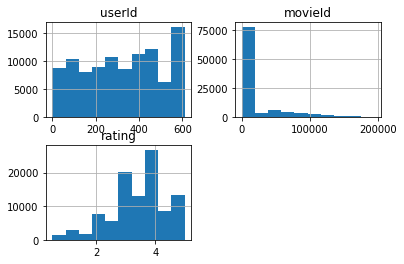

In [ ]:
#각 컬럼별의 시각화

ratings[['userId','movieId','rating']].hist()

"""유저는 다양한 사람들이지만 영화는 한정적인 것 같습니다. 그리고 평점은 대체적으로 평균이상입니다.
"""

In [ ]:
#실제로 위의 그래프를 바탕으로 유저와 영화의 unique를 구해봅니다.

#기본적으로  유저와 movie가 총 몇 개정도 들어있는지 확인하겠습니다.

unique_users = len(ratings['userId'].unique()) #unique한 유저
print(unique_users) #몇 명이나 있을까?

unique_movies = len(ratings['movieId'].unique())#unique한 영화
print(unique_movies)# 몇 개의 영화가 평점을 받았나

"""결과를 보니 영화는 중복된 것이 많고 유저는 덜 한 것으로 보입니다. 즉, 다양한 유저와 그렇지 않은 영화 의 수 정도로 해석해도 될 것 같습니다.
"""

610
9724


'결과를 보니 영화는 중복된 것이 많고 유저는 덜 한 것으로 보입니다. 즉, 다양한 유저와 그렇지 않은 영화 의 수 정도로 해석해도 될 것 같습니다.\n'

---

ratings의 가장 중요한 것은 무엇일까요?

아마도 평점일 것입니다.

평점을 중점으로 useId와 movieId를 활용해보겠습니다.

### 활용 순서


- **userid and ratings**


- **userid가 평균적으로 준 평점과 평점을 준 영화의 수**

- **rating이 많은 영화(즉, 사람들의 관심이 많은 영화)**

- **평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)**



In [ ]:
#일단 기본적으로 rating의 평균과 편차를 알아봅니다
print('평점의 평균:', ratings['rating'].mean())
print("평점의 표준편차:", ratings['rating'].std())

"""rating의 평균과 표준편차를 보니 왜 rating의 hist 형태가 나온지 짐작을 느낄 수 있을 것 같습니다.
"""

평점의 평균: 3.501556983616962
평점의 표준편차: 1.0425292390605359


'rating의 평균과 표준편차를 보니 왜 rating의 hist 형태가 나온지 짐작을 느낄 수 있을 것 같습니다.\n'

**Pandas의 Groupby를 활용하여 ranking 의미를 잘 파악해봅니다.**

In [ ]:
ratings.groupby(['userId','rating']).size()

"""유저가 영화의 평점을 준 분포도를 나타냅니다. 유저1은 1~5점을 다 주었지만, 유저610은 3~5점 사이를 주었네요
"""


'유저가 영화의 평점을 준 분포도를 나타냅니다. 유저1은 1~5점을 다 주었지만, 유저610은 3~5점 사이를 주었네요\n'

In [ ]:
ratings.groupby(['userId']).mean()

"""유저별로 평균적으로 준 평점을 알 수 있다.
"""

'유저별로 평균적으로 준 평점을 알 수 있다.\n'

**userid and ratings**


In [ ]:
userid_ratings =  pd.DataFrame({'count': ratings.groupby(['userId','rating']).size()}) #새로운 컬럼 생성
userid_ratings = userid_ratings.reset_index()#기존의 컬럼 리셋
userid_ratings.head(10) #결과 확인

"""유저별로 평점을 몇 점을 줬고 그 평점의 횟수를 알 수 있다.
"""

'유저별로 평점을 몇 점을 줬고 그 평점의 횟수를 알 수 있다.\n'

**user이 평균적으로 준 평점과 평점을 준 영화의 수**

In [ ]:
stats = pd.DataFrame({
    'movie_count': ratings.groupby('userId')['movieId'].count(),
    'rating_avg': ratings.groupby('userId')['rating'].mean(),
    'rating_std': ratings.groupby('userId')['rating'].std()})

print(stats.shape)

(610, 3)


In [ ]:
stats.head()

"""유저별 평점을 준 영화 수, 평균 평점 수와 편차
"""

'유저별 평점을 준 영화 수, 평균 평점 수와 편차\n'

**사람들에게 관심을 많이 받은 영화**

- rating이 높다



*재미있는 점: 흥행작인 영화일수록 평점이 좋을까?*

In [ ]:
movie_user = pd.DataFrame({
    'num_users_watch': ratings.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings.groupby('movieId')['rating'].mean(),
    'std_ratings': ratings.groupby('movieId')['rating'].std()
}) #새로운 df만들기

movie_user= movie_user.reset_index() #재설정
print(movie_user.shape)#확인

(9724, 4)


In [ ]:
movie_user.sort_values('num_users_watch',ascending=False).head()
"""흥행작의 평점 평균과 편차.
"""

'흥행작의 평점 평균과 편차.\n'

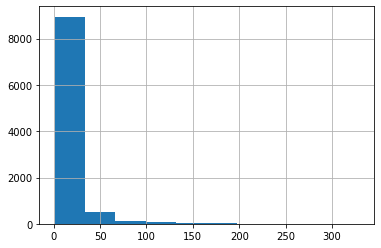

In [ ]:
#long tail economy
#한 쪽으로 쏠리는 현상
movie_user['num_users_watch'].hist()

In [ ]:
#1명만 평점을 준 영화
movie_user['movieId'][movie_user.num_users_watch ==1].count()

3446

In [ ]:
#3번 미만의 영화
movie_user['movieId'][movie_user.num_users_watch <3].count()

4744

총 9744개의 영화 중에서 평점을 3번 미만으로 받은 영화는 4744개 정도로 흥행작에 비해 그렇지 못한 작품이 많다는 것을 알 수 있다.

**평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)**

In [ ]:
#영화 정보를 활용
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#평점을 많이 받은 영화
ratings_count = ratings.groupby('movieId')['userId'].count()
ratings_count.head()

movieId
1    215
2    110
3     52
4      7
5     49
Name: userId, dtype: int64

In [ ]:
df = pd.DataFrame({
    'ratings_count': ratings.groupby('movieId')['userId'].count(),
})

In [ ]:
df['movie_name'] = df.apply(lambda x: movies['title'].loc[x.index])


In [ ]:
df.sort_values(by='ratings_count', ascending=False)


### 특정 영화의 평점 분포

- movieId: 356, Forrest Gump(1994)

- movieId: 2571. Matrix, The(1999)

**그 시대를 풍미했고 시간이 흐른 현재에도 회자될 정도의 영화들이 평점이 많이 분포되어있음을 알 수 있습니다.**

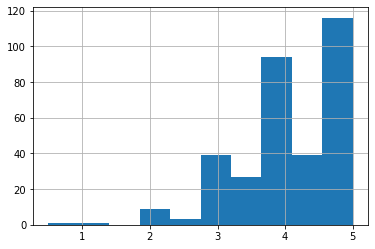

In [ ]:
ratings[ratings.movieId==356]['rating'].hist()

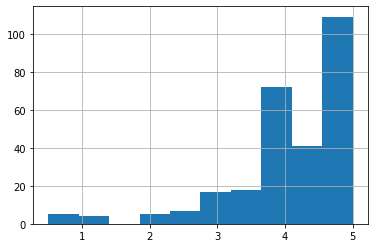

In [ ]:
ratings[ratings.movieId==2571]['rating'].hist()

### 특정 유저가 주는 평점과 실제 영화 평점 분포가 비슷할까?

**내가 주는 평점은 일반적일지 아니면 특이한 취향일지..?**

*평점이 높은 영화에 높지 않은 점수를 준 user*

In [ ]:
ratings[(ratings.movieId==356) &(ratings.rating<2)]

,userId,movieId,rating,timestamp
12274,76,356,1.0,1439165536
13553,89,356,0.5,1520408275


In [ ]:
ratings[(ratings.movieId==2571) &(ratings.rating<2)]

,userId,movieId,rating,timestamp
442,4,2571,1.0,945173385
1130,10,2571,0.5,1455356378
8706,59,2571,1.0,953609098
12239,75,2571,1.0,1158967564
17337,111,2571,0.5,1516140656
22474,153,2571,0.5,1525548255
65107,416,2571,1.0,1187496634
71534,461,2571,0.5,1505935248
71706,462,2571,0.5,1154037742


'재미있네요!! 실제로는 4점을 주로 주는 유저이군요\n'

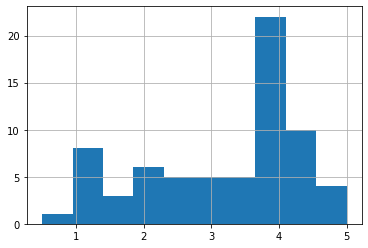

In [ ]:
#두 영화다 낮게 준 user75를 살펴보겠습니다.

ratings[ratings.userId==75]['rating'].hist()

"""재미있네요!! 실제로는 4점을 주로 주는 유저이군요
"""

---

# 영화 기본정보 데이터

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')
movies = pd.read_csv('/content/movies.csv')

### 장르 분석

**movie데이터에서 영화들의 장르를 파악해 보기**

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
#장르가 '|'기준으로 나눠져있기에 쪼개겠습니다.

all_genres = [x.split('|') for x in movies['genres'].values]


In [ ]:
import itertools
genres = list(set(list(itertools.chain(*all_genres))))#중복된 장르 제거
print(len(all_genres))# 중복된 장르 수
print(len(genres))#총 장르수
print(genres)
#제거하는 이유: 총 몇 개의 장르로 구성되어있느지 보기 위해서이다.

9742
20
['Western', 'Adventure', 'Musical', '(no genres listed)', 'Thriller', 'Children', 'Animation', 'Sci-Fi', 'War', 'Crime', 'Horror', 'Action', 'Mystery', 'Film-Noir', 'Drama', 'Fantasy', 'Comedy', 'Romance', 'IMAX', 'Documentary']


In [ ]:
#잘 나눠졌나 확인
genres_df = pd.DataFrame(columns = genres, index = movies.index)
genres_df.head()

In [ ]:
ct = 0
for i, row in genres_df.iterrows():
    movie_id = row.name
    list_of_genres = movies.loc[movie_id]['genres'].split("|")

    genres_df.loc[movie_id][list_of_genres] = 1

In [ ]:
#각 영화의 포함된 장르는1 그렇지 않으면 0으로 구성
genres_df = genres_df.fillna(0)
genres_df['num_genres'] = genres_df.sum(axis=1)
print(genres_df.shape)
print(genres_df)

*더 쉽게 나누는 법*


In [ ]:
#get_dummies활용

genres_df = movies['genres'].str.get_dummies(sep='|')
genres_df.head()

In [ ]:
movies_df = pd.concat([movies, genres_df], axis=1)
movies_df.head()
#각 영화별 장르 파악

### 특정 장르의 평점과 user 분석

In [ ]:
movies_df.columns

Index(['movieId', 'title', 'genres', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [ ]:
#특정 장르 설정

movieid_list = movies['title'][movies_df.Adventure ==1] #Adventure를 다른 장르로 바꿔가면서 user분석 가능
movieid_list.index

Int64Index([   0,    1,    7,    9,   12,   14,   28,   40,   48,   53,
            ...
            9697, 9700, 9706, 9707, 9708, 9710, 9713, 9717, 9720, 9731],
           dtype='int64', length=1263)

In [ ]:
animation_df = ratings[ratings['movieId'].isin(movieid_list.index)]
animation_df

In [ ]:
#user들이 adventure에 대한 평균 평점
animation_df.groupby('userId')['rating'].mean()

userId
1      4.074074
3      1.500000
4      3.142857
5      3.500000
6      3.478261
         ...   
606    3.697279
607    3.791667
608    2.915842
609    3.000000
610    3.685484
Name: rating, Length: 585, dtype: float64

### 장르간 상관관계

*장르별 유사도 파악*

In [ ]:
genres_df.corr()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40,40))
sns.heatmap(genres_df.corr(), annot=True)

### 영화 이름, 연도 분석

In [ ]:
movies_df.head()

In [ ]:
title_df = movies_df[['title', 'genres']]
title_df.head()


In [ ]:
#title의 연도 정보를 빼자
title_df['year'] = title_df['title'].str.extract('(\(\d\d\d\d\))')
title_df.head()

**연도가 없는 데이터 처리**

In [ ]:
title_df.isna().sum()
title_df[title_df['year'].isnull()]

,title,genres,year
6059,Babylon 5,Sci-Fi,NaN
9031,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,Hyena Road,(no genres listed),NaN
9138,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,Nocturnal Animals,Drama|Thriller,NaN
9259,Paterson,(no genres listed),NaN
9367,Moonlight,Drama,NaN
9448,The OA,(no genres listed),NaN
9514,Cosmos,(no genres listed),NaN
9515,Maria Bamford: Old Baby,(no genres listed),NaN


In [ ]:
# 연도가 없는 영화 또는 (no genres listed)라고 표시된 영화는 드랍할 수 있다.
title_df[title_df.genres == '(no genres listed)'].shape

(34, 3)

In [ ]:
#괄호제거
title_df.dropna(axis=0, inplace=True)
title_df['year'] = title_df['year'].apply(lambda x: x.replace('(','').replace(')',''))
title_df.head()

### 연도별 영화 데이터 분석

In [ ]:
year_freq_df = title_df.groupby('year')['title'].count()
year_freq_df

year
1902      1
1903      1
1908      1
1915      1
1916      4
       ... 
2014    278
2015    274
2016    218
2017    147
2018     41
Name: title, Length: 106, dtype: int64

In [ ]:
year_freq_df.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

### 영화와 개봉연도, 그리고 평점

In [ ]:
movies_df.head()
title_df
title_df[title_df['year'] == '2017']#연도는 바꾸면 됩니다

,title,genres,year
8687,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed),2017
8688,Justice League (2017),Action|Adventure|Sci-Fi,2017
8692,Black Panther (2017),Action|Adventure|Sci-Fi,2017
8694,Thor: Ragnarok (2017),Action|Adventure|Sci-Fi,2017
8695,Guardians of the Galaxy 2 (2017),Action|Adventure|Sci-Fi,2017
...,...,...,...
9728,Liquid Truth (2017),Drama,2017
9731,Gintama (2017),Action|Adventure|Comedy|Sci-Fi,2017
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017


In [ ]:
#2017년 영화 평점 평균
ratings['rating'][ratings['movieId'].isin(title_df[title_df['year'] == '2017'].index)].mean()


3.0

In [ ]:
#총 년도의 평균 평점
results = []
for year in title_df['year'].unique():
    avg_ratings = ratings['rating'][ratings['movieId'].isin(title_df[title_df['year'] == str(year)].index)].mean()
    results.append((year, avg_ratings))

result_df = pd.DataFrame(results, columns=['year','avg_ratings'])
result_df.sort_values(by='year')

,year,avg_ratings
91,1902,NaN
92,1903,NaN
105,1908,NaN
84,1915,3.250000
87,1916,3.408451
...,...,...
100,2014,3.441830
101,2015,3.398833
102,2016,3.375000
103,2017,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a6349ccd0>]],
      dtype=object)

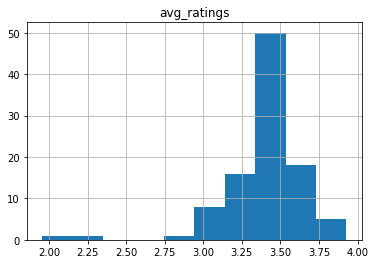

In [ ]:
result_df.hist()
